In [6]:

import numpy as np
import pandas as pd   
import os
from pathlib import Path
import glob
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers.experimental import preprocessing
import pickle

print('fim')
percentageData = "Percentage_0.01"
file_to_search = '/home/jupyter/imported/'
rede = "full"


fim


In [7]:
with open( str(percentageData) +  '/train_dataframe', "rb") as f:
     train_dataframe =  pickle.load(f) 
with open( str(percentageData) +  '/encoder', "rb") as f:
     encoder =  pickle.load(f)
with open( str(percentageData) +  '/val_dataframe', "rb") as f:
     val_dataframe =  pickle.load(f)

In [31]:
model2 = tf.keras.models.load_model(percentageData +"/ModelTreinamento")
if rede != "full":
    filepath=file_to_search + '//' + rede  
    print(filepath)
    model2 = tf.keras.models.load_model('Percentage_'+ str(percentageData) +"/ModelTreinamento")   

In [48]:
questao = 3


(0.0, 1.0, 0.0, 1.0)

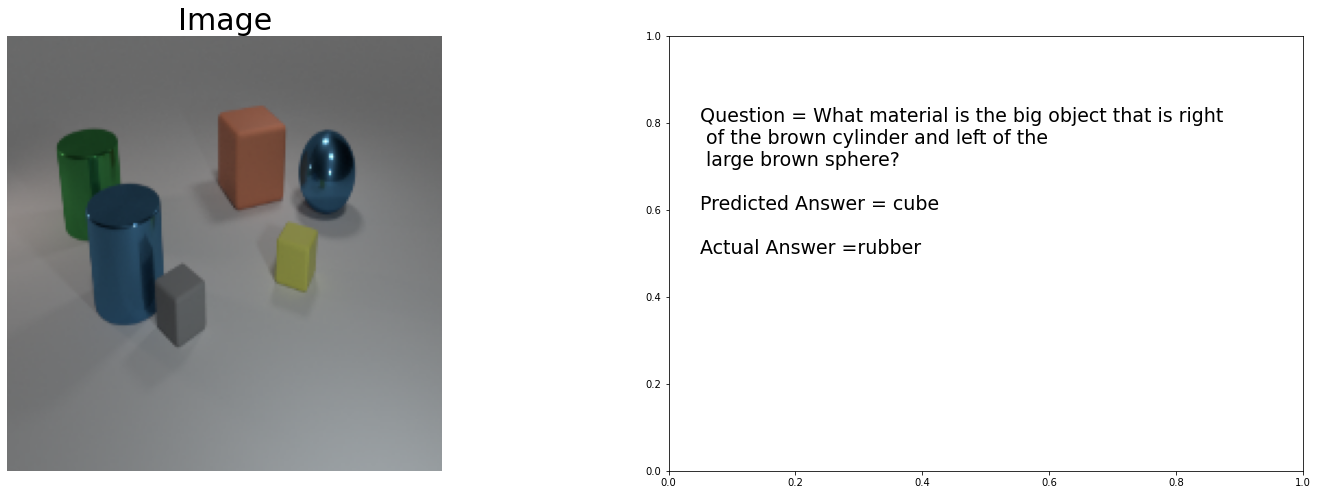

In [49]:
index=1
fig,axis=plt.subplots(1,2,figsize=(25, 8))
im=cv2.imread(train_dataframe.iloc[questao]['Path'])
im=cv2.resize(im,(200,200))
q=train_dataframe.iloc[questao]['Question']
q=encoder.encode(q)
paddings = [[0, 50-tf.shape(q)[0]]]
q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
q=np.array(q)
im.resize(1,200,200,3)
q.resize(1,50)
ans=model2.predict([im,q]) 
decodAns = encoder.decode([np.argmax(ans)])

im2=cv2.imread(train_dataframe.iloc[questao]['Path'])
im2=cv2.resize(im2,(200,200))
i = 0
question=""
flag=0

for i,j in enumerate(train_dataframe.iloc[questao]['Question']):
    if (flag==1) and (j==' '):
        question+='\n'
        flag=0
    question+=j
    if (i%40==0)and (i!=0):
        flag=1
axis[0].imshow(im2)
axis[0].axis('off')
axis[0].set_title('Image', fontsize=30)


axis[1].text(0.05,0.5,
"Question = {}\n\nPredicted Answer = {}\n\nActual Answer ={}".format(question,decodAns,train_dataframe.iloc[questao]['Answer']),
transform=plt.gca().transAxes,fontsize=19)
axis[1].axis('on')
